### In this project we are going to train models to understand the proportion of nutrients and weather conditions favourable for for specific crops and also predict the perfect crop given its nutrients composition and weather conditions

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### import all requirements 

In [117]:
df = pd.read_csv('C:/Users/HP/Downloads/Crop_Recommendation.csv')

In [118]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### check for the number of unique crops

In [123]:
df['Crop'].nunique()

22

#### List of unique crops

In [124]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

# 

#### Number of samples per crop present in the dataframe

In [125]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

#### A litle bit of EDA

In [127]:
df[df['Rainfall'] == df['Rainfall'].max() ]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
43,82,40,40,23.830675,84.813601,6.271479,298.560117,Rice


In [128]:
df[df['Temperature'] == df['Temperature'].max() ]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1743,59,62,52,43.675493,93.108872,6.608668,103.823566,Papaya


In [129]:
df[df['Humidity'] == df['Humidity'].max() ]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1889,40,22,29,27.558218,99.981876,5.735364,174.625648,Coconut


#### group by rain-fall to check the crop that requres the highest amount of rainfall

In [130]:
df.groupby('Crop')[['Rainfall']].mean().sort_values(by='Rainfall')

,Rainfall
Crop,
Muskmelon,24.689952
Lentil,45.680454
MungBean,48.403601
Watermelon,50.786219
MothBeans,51.198487
Blackgram,67.884151
Grapes,69.611829
ChickPea,80.058977
Cotton,80.398043


#### rainfall need graph by crop

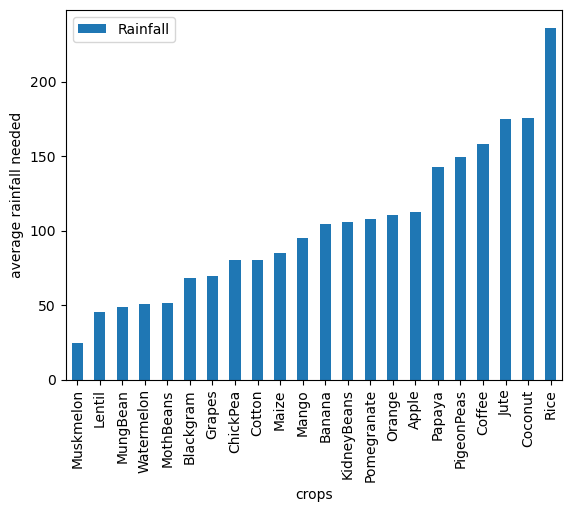

In [132]:
df.groupby('Crop')[['Rainfall']].mean().sort_values(by='Rainfall').plot(kind='bar')
plt.xlabel('crops')
plt.ylabel('average rainfall needed');

#### group by Humidity to check the Average amount needed per crop

In [134]:
df.groupby('Crop')[['Humidity']].mean().sort_values(by='Humidity')

,Humidity
Crop,
ChickPea,16.860439
KidneyBeans,21.605357
PigeonPeas,48.061633
Mango,50.156573
MothBeans,53.160418
Coffee,58.869846
Lentil,64.804785
Maize,65.092249
Blackgram,65.118426


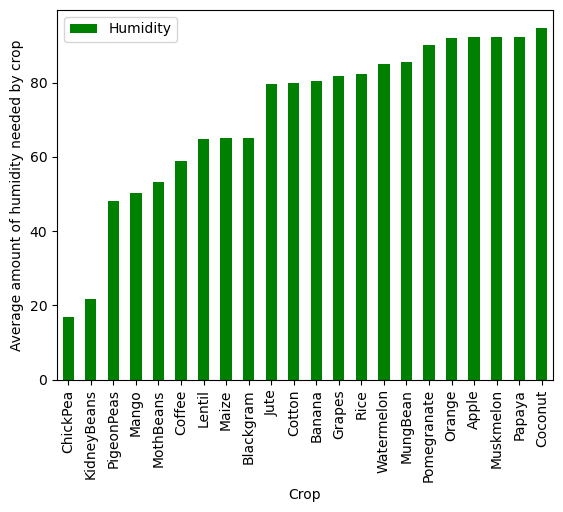

In [135]:
df.groupby('Crop')[['Humidity']].mean().sort_values(by='Humidity').plot(kind='bar', color='g')
plt.ylabel('Average amount of humidity needed by crop');

#### group by Temperature to check the average amount needed

In [138]:
df.groupby('Crop')[['Temperature']].mean().sort_values(by='Temperature')

,Temperature
Crop,
ChickPea,18.872847
KidneyBeans,20.115085
Pomegranate,21.837842
Maize,22.389204
Apple,22.630942
Orange,22.765725
Rice,23.689332
Grapes,23.849575
Cotton,23.988958


Text(0, 0.5, 'Average amount of temperature needed')

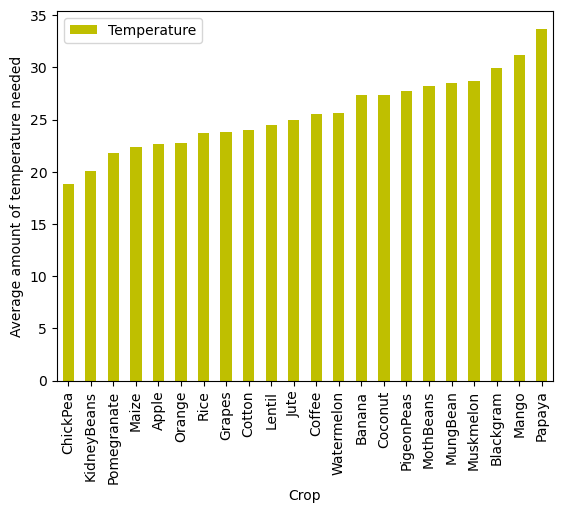

In [139]:
df.groupby('Crop')[['Temperature']].mean().sort_values(by='Temperature').plot(kind='bar', color='y')
plt.ylabel('Average amount of temperature needed')

# 

### Cheking for correlated features to avoid over-fitting of model

<Axes: >

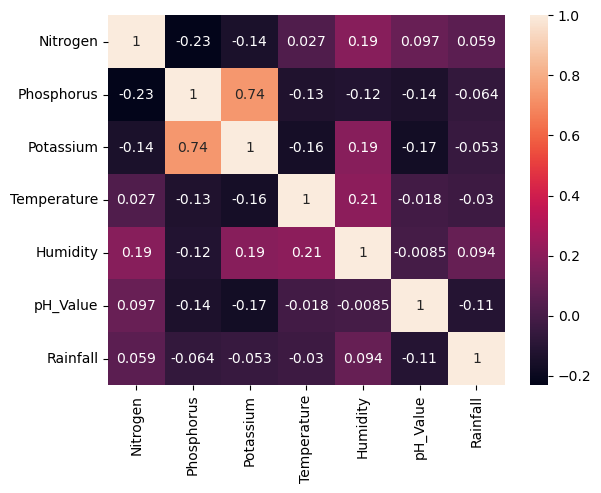

In [140]:
sns.heatmap(df.drop(columns='Crop').corr(), annot=True)

### checking for outliers, and removing the feature with the most outliers and also removing outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x1efd2542950>,
 'caps': [<matplotlib.lines.Line2D at 0x1efd2543c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efd17c6590>],
 'medians': [<matplotlib.lines.Line2D at 0x1efd2554d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efd1caf950>],
 'means': []}

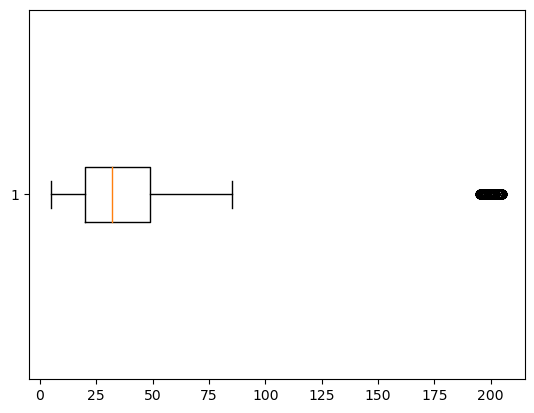

In [60]:
plt.boxplot(df['Potassium'], vert=False)

<Axes: ylabel='Frequency'>

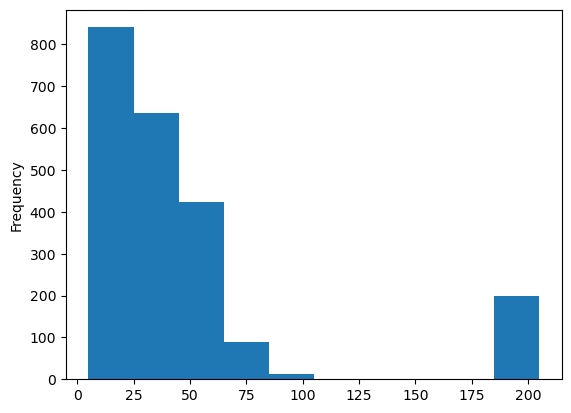

In [61]:
df['Potassium'].plot(kind = 'hist')

<Axes: >

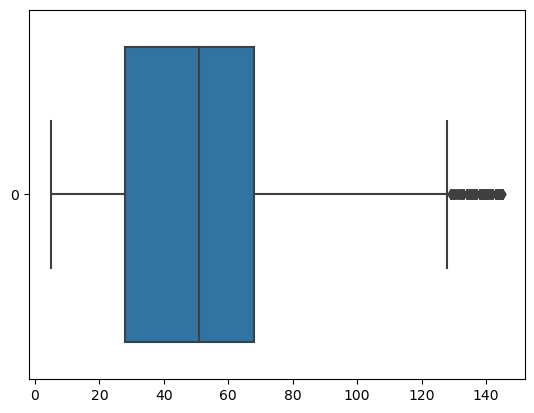

In [62]:
sns.boxplot(df['Phosphorus'], orient='h')

<Axes: ylabel='Frequency'>

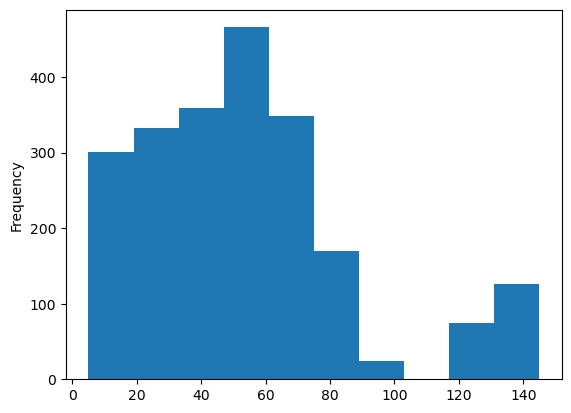

In [63]:
df['Phosphorus'].plot(kind='hist')

In [64]:
df.drop(columns='Potassium', inplace=True)

In [65]:
df = df[df['Phosphorus']<=100]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 2199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2000 non-null   int64  
 1   Phosphorus   2000 non-null   int64  
 2   Temperature  2000 non-null   float64
 3   Humidity     2000 non-null   float64
 4   pH_Value     2000 non-null   float64
 5   Rainfall     2000 non-null   float64
 6   Crop         2000 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 125.0+ KB


<Axes: >

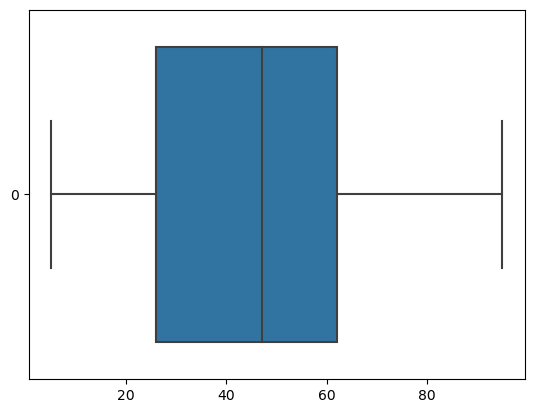

In [67]:
sns.boxplot(df['Phosphorus'], orient='h')

<Axes: ylabel='Frequency'>

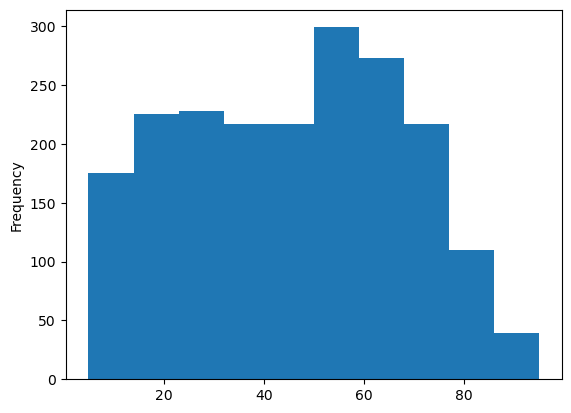

In [68]:
df['Phosphorus'].plot(kind='hist')

### splitting the data into features and target variables

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = df.drop(columns='Crop')

In [71]:
y = df['Crop']

### Scaling down dimention of the features to prevent complexity

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
scale = MinMaxScaler()

In [74]:
X = pd.DataFrame(scale.fit_transform(X), columns=X.columns)

In [75]:
X

,Nitrogen,Phosphorus,Temperature,Humidity,pH_Value,Rainfall
0,0.642857,0.411111,0.322859,0.790267,0.466264,0.656458
1,0.607143,0.588889,0.349317,0.770633,0.549480,0.741675
2,0.428571,0.555556,0.385973,0.793977,0.674219,0.875710
3,0.528571,0.333333,0.489542,0.768751,0.540508,0.799905
4,0.557143,0.411111,0.300593,0.785626,0.641291,0.871231
...,...,...,...,...,...,...
1995,0.764286,0.322222,0.497965,0.608410,0.509353,0.566064
1996,0.707143,0.111111,0.517049,0.494359,0.401561,0.386972
1997,0.842857,0.311111,0.419460,0.617880,0.444433,0.550071
1998,0.835714,0.300000,0.483046,0.441760,0.506045,0.384280


### Splitting the data set into training and test sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Building Models

#### Logistics Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_model = LogisticRegression()

In [79]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [80]:
log_model.intercept_

array([-5.92829155, -2.75686973,  3.34694448, -0.94282858,  1.16597476,
       -4.15667752, -2.62394947,  5.61979528,  1.06278358,  4.20136234,
        6.0511133 ,  4.03106508, -0.86681781, -2.11266186,  0.25969361,
       -8.271564  ,  0.70659891,  3.69108679, -3.73146957,  1.25471196])

In [81]:
log_predictions = log_model.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, accuracy_score

In [83]:
print(accuracy_score(y_test, log_predictions))

0.8566666666666667


In [81]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

      Banana       0.96      1.00      0.98        25
   Blackgram       0.83      0.81      0.82        31
    ChickPea       1.00      0.82      0.90        33
     Coconut       0.88      1.00      0.94        36
      Coffee       1.00      1.00      1.00        38
      Cotton       0.90      1.00      0.95        28
        Jute       1.00      0.79      0.88        28
 KidneyBeans       0.78      1.00      0.88        36
      Lentil       0.72      0.95      0.82        22
       Maize       1.00      0.93      0.96        28
       Mango       0.67      1.00      0.80        24
   MothBeans       1.00      0.56      0.71        36
    MungBean       0.77      1.00      0.87        24
   Muskmelon       0.91      1.00      0.95        30
      Orange       0.56      0.47      0.51        32
      Papaya       0.96      0.73      0.83        30
  PigeonPeas       0.97      0.78      0.86        36
 Pomegranate       0.65    

### SVM Model

In [99]:
from sklearn.svm import SVC

In [100]:
svc_model = SVC(kernel='poly')

In [101]:
svc_model.fit(X_train, y_train)

SVC(kernel='poly')

In [102]:
svc_predictions = svc_model.predict(X_test)

In [103]:
print(accuracy_score(y_test, svc_predictions))

0.9766666666666667


#### Artificial Neural Network model

In [105]:
from sklearn.neural_network import MLPClassifier

In [106]:
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50, 22), max_iter=200) 

In [107]:
nn_clf.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 50, 22))

In [108]:
nn_predict = nn_clf.predict(X_test)

In [109]:
print(accuracy_score(y_test, nn_predict))

0.9366666666666666


#### Random Forest classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier


In [111]:
rfc = RandomForestClassifier()

In [112]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
rfc_predict = rfc.predict(X_test)

In [114]:
print(accuracy_score(y_test, rfc_predict))

0.9866666666666667


# Since Random forest model and the SVM model perfomed the best, then they can and should be used to predictict and recomend the approapriate crop for a weather condition and set of nutrients